# Data Description
* CUSTID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases
* BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFFPURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTSPURCHASES : Amount of purchase done in installment
* CASHADVANCE : Cash in advance given by the user
* PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASESTRX : Numbe of purchase transactions made
* CREDITLIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user


# Import Libraries

In [1]:
#import EDA tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import modeling tools and metrics
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import davies_bouldin_score

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
#load dataset
df=pd.read_csv("../input/ccdata/CC GENERAL.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Data Cleaning

In [3]:
#find missing values
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
df1 = df.drop('CUST_ID', axis = 1) #dropping Customer ID 
df1.fillna(method ='bfill', inplace = True) #filling the missing values with BFILL method

#df1["MINIMUM_PAYMENTS"].fillna(df1["MINIMUM_PAYMENTS"].mean(), inplace=True)
#df1["CREDIT_LIMIT"].fillna(df1["CREDIT_LIMIT"].mean(), inplace=True)

In [5]:
#Detecting outliers
for i in df1.select_dtypes(include=['float64','int64']).columns:
  max_threshold=df1[i].quantile(0.95)
  min_threshold=df1[i].quantile(0.05)
  df1_no_outlier=df1[(df1[i] < max_threshold) & (df1[i] > min_threshold)].shape
  print(" outlier in ",i,"is" ,int(((df1.shape[0]-df1_no_outlier[0])/df1.shape[0])*100),"%")

 outlier in  BALANCE is 10 %
 outlier in  BALANCE_FREQUENCY is 75 %
 outlier in  PURCHASES is 27 %
 outlier in  ONEOFF_PURCHASES is 53 %
 outlier in  INSTALLMENTS_PURCHASES is 48 %
 outlier in  CASH_ADVANCE is 56 %
 outlier in  PURCHASES_FREQUENCY is 47 %
 outlier in  ONEOFF_PURCHASES_FREQUENCY is 53 %
 outlier in  PURCHASES_INSTALLMENTS_FREQUENCY is 58 %
 outlier in  CASH_ADVANCE_FREQUENCY is 57 %
 outlier in  CASH_ADVANCE_TRX is 56 %
 outlier in  PURCHASES_TRX is 27 %
 outlier in  CREDIT_LIMIT is 14 %
 outlier in  PAYMENTS is 10 %
 outlier in  MINIMUM_PAYMENTS is 10 %
 outlier in  PRC_FULL_PAYMENT is 71 %
 outlier in  TENURE is 91 %


In [6]:
#remove outliers from columns having nearly 10% outlier
max_threshold_BALANCE=df1["BALANCE"].quantile(0.95)
min_threshold_BALANCE=df1["BALANCE"].quantile(0.05)
max_threshold_CREDIT_LIMIT=df1["CREDIT_LIMIT"].quantile(0.95)
min_threshold_CREDIT_LIMIT=df1["CREDIT_LIMIT"].quantile(0.05)
max_threshold_PAYMENTS=df1["PAYMENTS"].quantile(0.95)
min_threshold_PAYMENTS=df1["PAYMENTS"].quantile(0.05)
df1_no_outlier=df1[(df1["CREDIT_LIMIT"] < max_threshold_CREDIT_LIMIT) & (df1["CREDIT_LIMIT"] > min_threshold_CREDIT_LIMIT) & (df1["BALANCE"] < max_threshold_BALANCE) & (df1["BALANCE"] > min_threshold_BALANCE) &  (df1["PAYMENTS"] < max_threshold_PAYMENTS) & (df1["PAYMENTS"] > min_threshold_PAYMENTS)]

In [7]:
#Normalizing the Data 
normalized_df = pd.DataFrame(normalize(df1_no_outlier))
normalized_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.293876,0.000083,0.000000,0.000000,0.000000,0.59124,0.000000,0.000000,0.000000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.00002,0.001101
1,0.310798,0.000125,0.096307,0.096307,0.000000,0.00000,0.000125,0.000125,0.000000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.00000,0.001495
2,0.504284,0.000617,0.009867,0.009867,0.000000,0.00000,0.000051,0.000051,0.000000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.00000,0.007400
3,0.428658,0.000237,0.315788,0.000000,0.315788,0.00000,0.000158,0.000000,0.000138,0.000000,0.000000,0.001895,0.426330,0.331604,0.570156,0.00000,0.002842
4,0.584314,0.000320,0.139762,0.000000,0.139762,0.00000,0.000320,0.000000,0.000320,0.000000,0.000000,0.003845,0.736940,0.217578,0.170468,0.00000,0.003845


<AxesSubplot:>

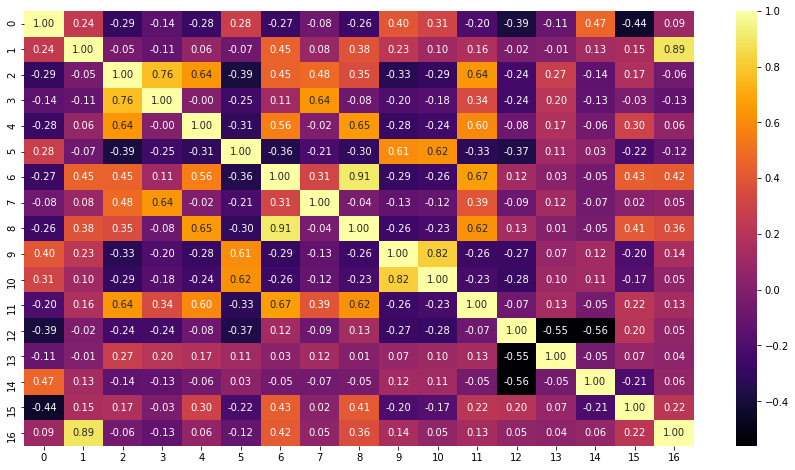

In [8]:
#Correlation matrix

fig = plt.subplots(figsize=(15,8))

sns.heatmap(normalized_df.corr(),
            annot=True,
            fmt="0.2f",
            cmap="inferno")

##### Dimension Reduction (PCA)

In [9]:
#appling PCA
pca = PCA() 
pcadf = pca.fit_transform(normalized_df) 
pcadf = pd.DataFrame(pcadf) 

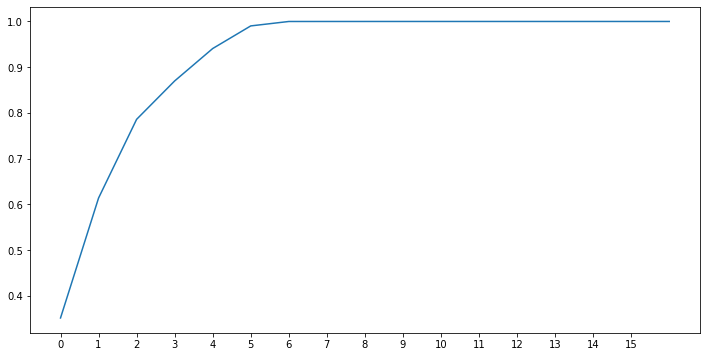

In [10]:
plt.subplots(figsize=(12,6))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xticks(np.arange(0,16,1));

* Conclusion : We should choose 2 as n_components

In [11]:
#Setting 2 as n_components
pca = PCA(n_components = 2) 
pcadf = pca.fit_transform(normalized_df) 
pcadf = pd.DataFrame(pcadf) 
pcadf.columns = ['PC1', 'PC2']   

pcadf.head()

,PC1,PC2
0,0.346585,-0.032200
1,-0.126068,-0.226061
2,0.162606,-0.023479
3,0.259072,0.336400
4,0.154561,-0.057130


In [12]:
pca.explained_variance_ratio_

array([0.35116079, 0.26244421])

In [13]:
pca.explained_variance_ratio_.cumsum()

array([0.35116079, 0.613605  ])

# Train model
### Choosing k as number of clusters

`Elbow method`
* This method helps us to choose the right k for number of clusters

`Silhouette Score`
* This metric can help us to evaluate our performance and find out the best k for number of clusters

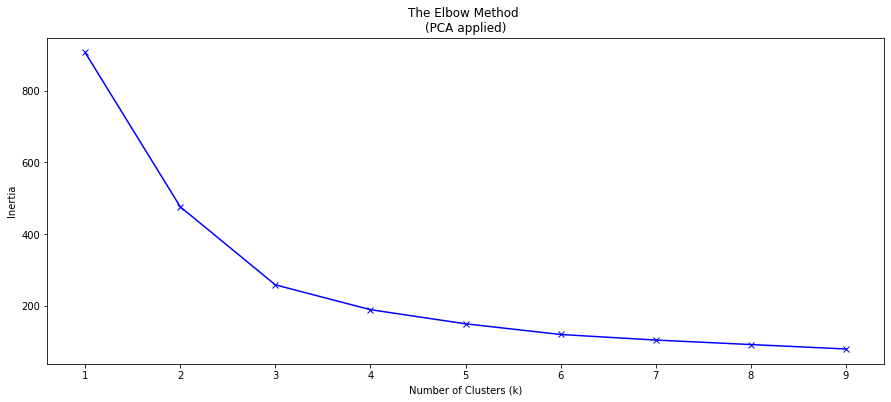

In [14]:
#using elbow rule on pcadf (PCA applied)
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pcadf)
    inertia.append(kmeanModel.inertia_)
plt.figure(figsize=(15,6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method \n(PCA applied)')
plt.show()

In [15]:
#Creating evaluate function to evaluate our models performance
def evaluate(model, data, silhouette_visualizer=False):
  """
  Plotting Silhouette Diagram or Silhouette Visualizer, print Silhouette Score and Davies Bouldin Score to evaluate your model performance.

  Parameters:
  model : pass your estimator with model argument to this function.
  data : data is your dataframe which is going to be trained.
  silhouette_visualizer : defualt is False, you can plot silhouette diagram by passing True. 
  """
  if silhouette_visualizer:
    from yellowbrick.cluster import SilhouetteVisualizer

    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(data)

  y = model.fit_predict(data)


  SC = "Silhouette Score"+" : "+str("{:.2f}".format(silhouette_score(data, y)))
  DBC = "Davies Bouldin Score"+" : "+str("{:.2f}".format(davies_bouldin_score(data, y)))


  print(SC)
  print(DBC)

### KMeans

In [16]:
#training model and evaluation
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  print("Number of Clusters : " + str(i))
  evaluate(kmeans, pcadf)
  print("====================")

Number of Clusters : 2
Silhouette Score : 0.46
Davies Bouldin Score : 0.92
Number of Clusters : 3
Silhouette Score : 0.51
Davies Bouldin Score : 0.71
Number of Clusters : 4
Silhouette Score : 0.48
Davies Bouldin Score : 0.76
Number of Clusters : 5
Silhouette Score : 0.45
Davies Bouldin Score : 0.81
Number of Clusters : 6
Silhouette Score : 0.45
Davies Bouldin Score : 0.74
Number of Clusters : 7
Silhouette Score : 0.44
Davies Bouldin Score : 0.80
Number of Clusters : 8
Silhouette Score : 0.45
Davies Bouldin Score : 0.75
Number of Clusters : 9
Silhouette Score : 0.44
Davies Bouldin Score : 0.75
Number of Clusters : 10
Silhouette Score : 0.39
Davies Bouldin Score : 0.81


Silhouette Score : 0.51
Davies Bouldin Score : 0.71


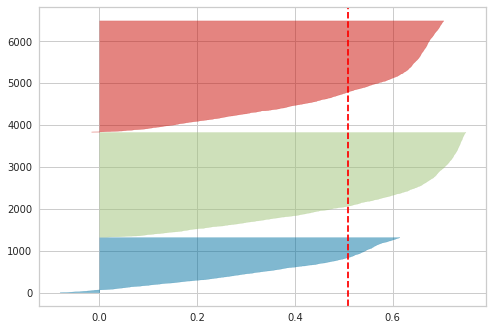

In [17]:
#plotting silhouette diagram for n_clusters = 3
kmeans = KMeans(n_clusters=3, random_state=42)
evaluate(kmeans, pcadf, silhouette_visualizer=True)

* Conclusion : We can accept the KMeans with 3 as n_clusters because the size of clusters are almost similar.

  Let's try another estimators and choose the best one!

### GaussianMixture

In [18]:
#training model and evaluation
for i in range(2,11):
  gmm = GaussianMixture(n_components=i, random_state=42)
  print("Number of Components : " + str(i))
  evaluate(gmm, pcadf)
  print("====================")

Number of Components : 2
Silhouette Score : 0.36
Davies Bouldin Score : 1.05
Number of Components : 3
Silhouette Score : 0.33
Davies Bouldin Score : 1.19
Number of Components : 4
Silhouette Score : 0.29
Davies Bouldin Score : 1.11
Number of Components : 5
Silhouette Score : 0.32
Davies Bouldin Score : 1.14
Number of Components : 6
Silhouette Score : 0.29
Davies Bouldin Score : 1.10
Number of Components : 7
Silhouette Score : 0.30
Davies Bouldin Score : 0.95
Number of Components : 8
Silhouette Score : 0.32
Davies Bouldin Score : 1.00
Number of Components : 9
Silhouette Score : 0.29
Davies Bouldin Score : 0.98
Number of Components : 10
Silhouette Score : 0.23
Davies Bouldin Score : 0.98


### Spectral Clustering

In [19]:
#training model and evaluation
for i in range(2,11):
  spc = SpectralClustering(n_clusters=i, affinity='rbf') 
  print("Number of Clusters : " + str(i))
  evaluate(spc, pcadf)
  print("====================")

Number of Clusters : 2
Silhouette Score : 0.46
Davies Bouldin Score : 0.92
Number of Clusters : 3
Silhouette Score : 0.51
Davies Bouldin Score : 0.71
Number of Clusters : 4
Silhouette Score : 0.47
Davies Bouldin Score : 0.73
Number of Clusters : 5
Silhouette Score : 0.41
Davies Bouldin Score : 0.77
Number of Clusters : 6
Silhouette Score : 0.35
Davies Bouldin Score : 0.84
Number of Clusters : 7
Silhouette Score : 0.31
Davies Bouldin Score : 0.86
Number of Clusters : 8
Silhouette Score : 0.34
Davies Bouldin Score : 0.83
Number of Clusters : 9
Silhouette Score : 0.33
Davies Bouldin Score : 0.79
Number of Clusters : 10
Silhouette Score : 0.32
Davies Bouldin Score : 0.88


### Agglomerative Clustering

In [20]:
#train model and evaluate the performance
linkages = ["ward", "single", "average"]
for i in range(2,11):
  for lk in linkages:
    hcluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage=lk)
    print("Number of Clusters : " + str(i) + "  linkage : "+lk)
    evaluate(hcluster,pcadf)
    print("====================")

Number of Clusters : 2  linkage : ward
Silhouette Score : 0.45
Davies Bouldin Score : 0.94
Number of Clusters : 2  linkage : single
Silhouette Score : 0.36
Davies Bouldin Score : 0.47
Number of Clusters : 2  linkage : average
Silhouette Score : 0.35
Davies Bouldin Score : 0.66
Number of Clusters : 3  linkage : ward
Silhouette Score : 0.47
Davies Bouldin Score : 0.69
Number of Clusters : 3  linkage : single
Silhouette Score : 0.32
Davies Bouldin Score : 0.49
Number of Clusters : 3  linkage : average
Silhouette Score : 0.41
Davies Bouldin Score : 0.74
Number of Clusters : 4  linkage : ward
Silhouette Score : 0.45
Davies Bouldin Score : 0.77
Number of Clusters : 4  linkage : single
Silhouette Score : 0.14
Davies Bouldin Score : 0.52
Number of Clusters : 4  linkage : average
Silhouette Score : 0.37
Davies Bouldin Score : 0.82
Number of Clusters : 5  linkage : ward
Silhouette Score : 0.38
Davies Bouldin Score : 0.91
Number of Clusters : 5  linkage : single
Silhouette Score : 0.14
Davies Bou

The best case is:

Number of Clusters = 3 and linkage = ward

# Clustering Visualization

In [21]:
#create plot model clustering function
def plot_model_clustering(model, data):
  plt.figure(figsize=(15,7))
  model.fit(data)
  labels= model.labels_
  df_label=data.copy()
  df_label['labels']= labels
  ax = sns.scatterplot(x='PC1', y='PC2', hue='labels', data=df_label, palette='bright')
  for index in range(len(str(model))):
    if str(model)[index] == '(':
      ind = index
  ax.set_title(str(model)[:ind])

  evaluate(model, data)

Silhouette Score : 0.51
Davies Bouldin Score : 0.71


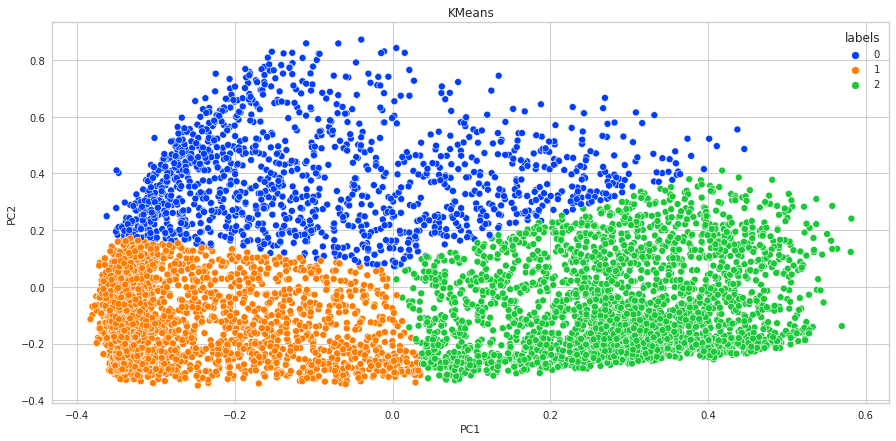

In [22]:
plot_model_clustering(kmeans, pcadf)

Silhouette Score : 0.47
Davies Bouldin Score : 0.69


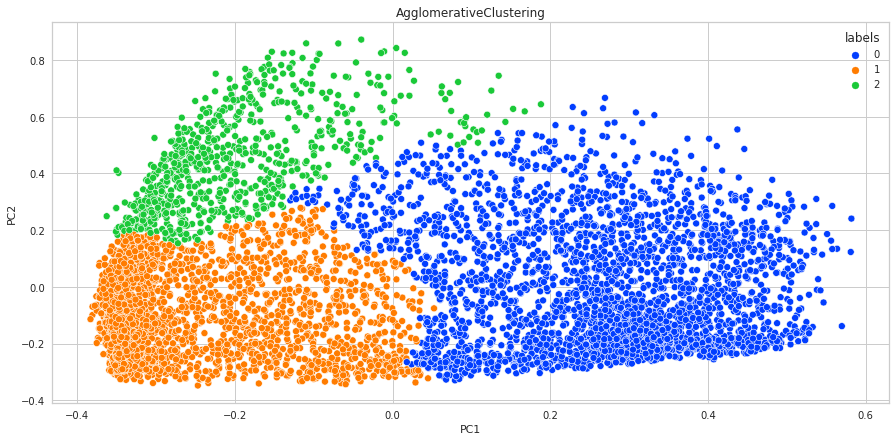

In [23]:
hcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage="ward")
plot_model_clustering(hcluster, pcadf)

### Last Note : Both KMeans and Agglomerative with 3 as number of clusters are good to use however, based on Silhouette Score KMeans is the best one!